# **Linear Regression**

Before diving into Linear Regression, we need to know what exactly "regression" is.

Regression is basically the way you find the new value from existing values. What does it mean to find the new value from existing values though? 

Suppose we have a data containing the relationship between the height and the weight.
For instance, 5.5 feet - 60 kg, 5.4 feet - 50kg and so on.

We will have a lot of these height-weight data. And from that data, we derive a certain pattern. Like, for each feet the weight is X. And then from this pattern, we predict or find the new weight for new height.

We will apply this down the line.

### **Now what is "linear" in Linear Regression?**

There are several regression methods, but Linear regression in particular is the way you predict the values from the data which is in **linear** format.

But what does it mean that the data is in linear format?

If the dependent variable increases or decreases with the increse or decrease of your independent variable in uniform way, it's called a linear format.

Example:
- if you age older, your weight will increase with your age, right? (assuming from birth to adulthood)
- With the increase of rounds per minute (rpm) of your wheel, the faster you move, and the faster you get to your destination (assuming no gear changes and no brakes applied)
- the less your spending capacity, the less you buy what you want.

### **Practical Example with Height-Weight data**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

We will be using Numpy for calculations and Matplotlib for plotting the data.

Now let's import the Height-Weight dataset.

In [2]:
data = np.loadtxt("/kaggle/input/weight-hight-dataset/weight-height (1).csv", delimiter=",", skiprows=1, usecols=(1, 2))
print(data)
print(f"\n {data.shape}")

[[ 73.84701702 241.89356318]
 [ 68.78190405 162.31047252]
 [ 74.11010539 212.74085556]
 ...
 [ 63.86799221 128.47531878]
 [ 69.03424313 163.85246135]
 [ 61.94424588 113.64910268]]

 (10000, 2)


As we can see the data, we have height in inches and weight in pounds.

And we have 10 thousand rows and 2 columns. That's a lot of data there.

Let's put the Height in **x** and Weight in **y**, so that we can plot and analyze how our data looks like.

In [3]:
x = (data[:, 0]/12)
y = (data[:, 1]/2.205)

Text(0, 0.5, 'Weight (kg)')

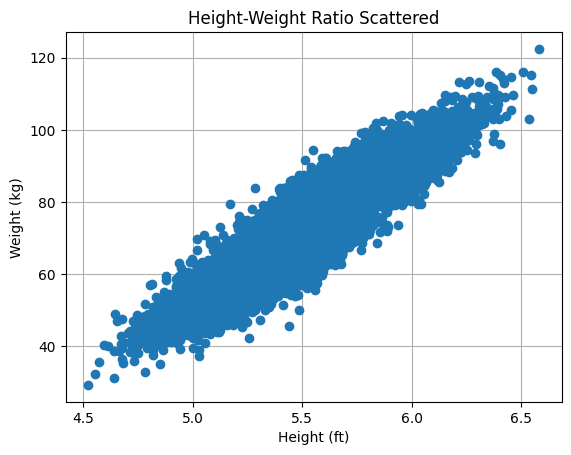

In [4]:
plt.plot(x, y, "o")
plt.grid(True)
plt.title("Height-Weight Ratio Scattered")
plt.xlabel("Height (ft)")
plt.ylabel("Weight (kg)")

Woah, this is how our data looks like when we plot into the graph. 

So, what's happening here? 
5ft tall people range from 40-60 kg.
5.5 ft tall people ranging from 55 to almost 90 and so on.

Here, we need to find what is the best pattern of height-weight that defines this dataset. By how much weight increases with the increase of height **according to this data**.